In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pathlib import Path

path = Path.cwd()
data_path = path.parent / 'data' / 'combined'

countries = ['austria', 'belgium', 'germany', 'italy', 'netherlands']

df = {}
for country in countries :
    file_path = data_path / (country+'.csv')
    df[country] = pd.read_csv(file_path)

We have to look at the data country wise

In [3]:
country = 'austria'
print('Data Shape',df['austria'].shape)
df['austria'].sample(5)

Data Shape (156, 385)


,"""RTS,S""",Acetaldehydsyndrom,Achsensymptom,Adeno-assoziierte_Viren,Adenovirusimpfstoff,Adipsie,Adynamie,Aggravation,Agitation_(Medizin),Akantholyse,...,Zohlen-Zeichen,Zoonose,Zwerchfellhochstand,Zyanose,cases,incidence,week,Ödem,Übelkeit,date
143,0.0,166.0,1.0,188.0,18.0,228.0,195.0,434.0,0.0,103.0,...,150.0,NaN,221.0,2044.0,NaN,1152.238379,2018-03,4827.0,796.0,2018-01-21
77,0.0,71.0,2.0,88.0,0.0,48.0,163.0,300.0,0.0,73.0,...,121.0,NaN,212.0,1308.0,96.0,328.620819,2015-15,5.0,0.0,2015-04-19
58,0.0,82.0,5.0,92.0,0.0,42.0,231.0,382.0,0.0,81.0,...,166.0,1483.0,176.0,1408.0,369.0,897.351718,2014-48,5.0,3.0,2014-12-07
92,0.0,100.0,3.0,120.0,9.0,61.0,287.0,397.0,0.0,135.0,...,122.0,NaN,208.0,1266.0,502.0,1193.362811,2016-04,0.0,0.0,2016-01-31
129,0.0,116.0,1.0,74.0,7.0,166.0,171.0,347.0,0.0,74.0,...,121.0,NaN,199.0,1771.0,0.0,0.000000,2017-15,4842.0,644.0,2017-04-16


In [4]:
df_austria = df['austria']
df['austria'] = df_austria
df['austria'].describe()

,"""RTS,S""",Acetaldehydsyndrom,Achsensymptom,Adeno-assoziierte_Viren,Adenovirusimpfstoff,Adipsie,Adynamie,Aggravation,Agitation_(Medizin),Akantholyse,...,Zervizitis,Zikavirus-Epidemie_2015/2016,Zohlen-Zeichen,Zoonose,Zwerchfellhochstand,Zyanose,cases,incidence,Ödem,Übelkeit
count,156.0,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,144.000000,156.0,156.000000,...,156.000000,156.000000,156.000000,66.000000,156.000000,156.000000,130.000000,156.000000,156.000000,156.000000
mean,0.0,106.044872,2.307692,114.685897,4.512821,107.423077,242.121795,404.152778,0.0,111.160256,...,23.044872,21.217949,185.237179,1330.560606,262.717949,1933.211538,398.892308,880.461157,1579.358974,251.942308
std,0.0,35.336419,2.699141,29.542709,5.373156,62.227578,96.730777,82.270177,0.0,43.810663,...,33.477646,32.972578,85.005891,360.611068,112.797781,588.776446,239.507934,429.093467,2262.157075,360.486486
min,0.0,48.000000,0.000000,31.000000,0.000000,26.000000,79.000000,140.000000,0.0,33.000000,...,0.000000,0.000000,45.000000,587.000000,95.000000,691.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,81.750000,0.000000,97.000000,0.000000,60.000000,173.000000,365.250000,0.0,85.000000,...,0.000000,0.000000,127.750000,1074.250000,180.500000,1461.250000,258.000000,636.664425,0.000000,0.000000
50%,0.0,96.000000,2.000000,111.000000,1.000000,80.000000,216.500000,399.500000,0.0,99.000000,...,1.000000,0.000000,158.000000,1356.000000,220.000000,1871.500000,380.000000,816.951024,7.000000,3.000000
75%,0.0,130.250000,3.000000,132.000000,8.000000,164.500000,289.750000,450.000000,0.0,131.000000,...,55.250000,45.750000,230.000000,1508.750000,345.750000,2342.250000,532.000000,1120.661459,4296.250000,665.250000
max,0.0,216.000000,12.000000,193.000000,21.000000,264.000000,511.000000,651.000000,0.0,334.000000,...,115.000000,150.000000,492.000000,2980.000000,568.000000,3600.000000,992.000000,2052.819744,5756.000000,1004.000000


In [5]:
print(df['austria'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Columns: 385 entries, "RTS,S" to date
dtypes: float64(383), object(2)
memory usage: 469.3+ KB
None


In [6]:
df['austria'].dropna()

,"""RTS,S""",Acetaldehydsyndrom,Achsensymptom,Adeno-assoziierte_Viren,Adenovirusimpfstoff,Adipsie,Adynamie,Aggravation,Agitation_(Medizin),Akantholyse,...,Zohlen-Zeichen,Zoonose,Zwerchfellhochstand,Zyanose,cases,incidence,week,Ödem,Übelkeit,date


In [7]:
df['austria'].dropna(axis=1).sample(5)

,"""RTS,S""",Acetaldehydsyndrom,Achsensymptom,Adeno-assoziierte_Viren,Adenovirusimpfstoff,Adipsie,Adynamie,Agitation_(Medizin),Akantholyse,Akroosteolyse,...,Zervizitis,Zikavirus-Epidemie_2015/2016,Zohlen-Zeichen,Zwerchfellhochstand,Zyanose,incidence,week,Ödem,Übelkeit,date
152,0.0,113.0,1.0,134.0,5.0,186.0,145.0,0.0,103.0,89.0,...,92.0,48.0,106.0,161.0,1843.0,811.981627,2018-12,4424.0,654.0,2018-03-25
74,0.0,82.0,2.0,79.0,0.0,64.0,183.0,0.0,131.0,0.0,...,0.0,0.0,151.0,201.0,1368.0,1025.671313,2015-12,2.0,0.0,2015-03-29
120,0.0,160.0,1.0,193.0,13.0,205.0,252.0,0.0,131.0,84.0,...,72.0,56.0,173.0,220.0,2160.0,1299.453524,2017-06,5475.0,943.0,2017-02-12
34,0.0,51.0,4.0,107.0,0.0,51.0,259.0,0.0,70.0,0.0,...,0.0,0.0,179.0,331.0,2046.0,832.629883,2013-50,9.0,1.0,2013-12-22
78,0.0,108.0,2.0,76.0,12.0,41.0,157.0,0.0,88.0,0.0,...,0.0,0.0,119.0,189.0,1162.0,769.594453,2015-42,0.0,0.0,2015-10-25


Dropping all columns where every element is zero.

In [8]:
df['austria'] = df['austria'].loc[:, (df['austria'] != 0).any(axis=0)]
df['austria'].shape

(156, 373)

In [9]:
#missing data
total = df['austria'].isnull().sum().sort_values(ascending=False)
total

Otitis_externa                                             156
Syndrom                                                    156
Epidemie                                                   155
VSV-EBOV                                                   154
Bartholinitis                                              150
Influenzavirus                                             144
Pseudopolyp                                                141
Klosneuvirus                                               141
Sepsis                                                     138
Mastitis                                                   138
Epiglottitis                                               132
Vulvovaginitis                                             126
Mollivirus_sibericum                                       123
Lymphangitis                                               114
CAd3-ZEBOV                                                 112
Endometritis                                           

In [10]:
percent = (df['austria'].isnull().sum()/df['austria'].isnull().count()).sort_values(ascending=False)

percent

Otitis_externa                                             1.000000
Syndrom                                                    1.000000
Epidemie                                                   0.993590
VSV-EBOV                                                   0.987179
Bartholinitis                                              0.961538
Influenzavirus                                             0.923077
Pseudopolyp                                                0.903846
Klosneuvirus                                               0.903846
Sepsis                                                     0.884615
Mastitis                                                   0.884615
Epiglottitis                                               0.846154
Vulvovaginitis                                             0.807692
Mollivirus_sibericum                                       0.788462
Lymphangitis                                               0.730769
CAd3-ZEBOV                                      

dropping columns where amount of missing data is more than 20%

In [11]:
for column, null_percent in percent.items() :
    if null_percent > 0.2:
        df['austria'] = df['austria'].drop(columns=[column])

df['austria'] = df['austria'].drop(columns=['cases'])

df['austria'].shape

(156, 303)

In [12]:
percent = (df['austria'].isnull().sum()/df['austria'].isnull().count()).sort_values(ascending=False)
percent

Parotitis                                                  0.192308
Rhinosinusitis                                             0.153846
Fieber                                                     0.108974
Aggravation                                                0.076923
date                                                       0.000000
Hospitalfieber                                             0.000000
Herdenzephalitis                                           0.000000
Hexavalenter_Impfstoff                                     0.000000
Hexenschuss                                                0.000000
Hiatus_leucaemicus                                         0.000000
Hordeolum                                                  0.000000
Horner-Syndrom                                             0.000000
Hyperhydratation                                           0.000000
Hypalbuminämie                                             0.000000
Hepatitis-B-Impfstoff                           

In [13]:
df_austria = df['austria']

In [14]:
missing_austria = df_austria.filter(['week', 'incidence', 'Parotitis', 'Rhinosinusitis', 'Fieber',
                                     'Aggravation'], axis=1)
missing_austria.sample(5)

,week,incidence,Parotitis,Rhinosinusitis,Fieber,Aggravation
5,2012-47,851.424241,841.0,313.0,NaN,473.0
109,2016-47,789.467172,811.0,512.0,7151.0,423.0
138,2017-50,806.402593,528.0,215.0,6426.0,337.0
142,2018-02,1014.684340,NaN,NaN,8459.0,NaN
14,2013-04,1284.000968,NaN,NaN,24172.0,651.0


On observing the missing_austria dataframe, we can conclude that all the missing data is during the peak season of
influenza. Hence estimaing the value using a mean or a median will not work.
If we drop all the columns with missing data, we will still have all the 311 columns out of 385, which is 80% of the data.

In [15]:
print('Aggravation:\t'+str(df['austria'][df['austria'].columns[1:]].corr()['Aggravation'][:].sort_values(ascending=False)[1]))
print('Fieber:\t'+str(df['austria'][df['austria'].columns[1:]].corr()['Fieber'][:].sort_values(ascending=False)[1]))
print('Rhinosinusitis:\t'+str(df['austria'][df['austria'].columns[1:]].corr()['Rhinosinusitis'][:].sort_values(ascending=False)[1]))
print('Parotitis:\t'+str(df['austria'][df['austria'].columns[1:]].corr()['Parotitis'][:].sort_values(ascending=False)[1]))

Aggravation:	0.7837571745227001
Fieber:	0.9251953049116091
Rhinosinusitis:	0.6587439841627508
Parotitis:	0.8767282167396552


We can drop Parotisis and Fieber as they have really high correlation with other columns.

In [16]:
df['austria'] = df['austria'].drop(columns=['Parotitis', 'Fieber'])
missing_austria = df_austria.filter(['week', 'incidence', 'Rhinosinusitis', 'Aggravation'], axis=1)

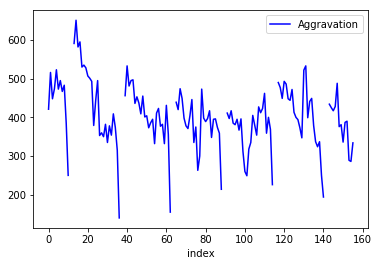

In [17]:
missing_austria.reset_index().plot(x='index',y='Aggravation',color='blue')

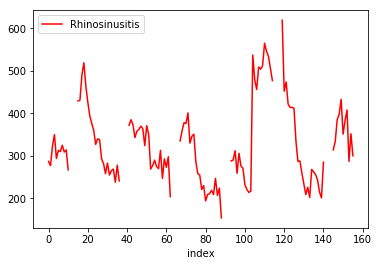

In [18]:
missing_austria.reset_index().plot(x='index',y='Rhinosinusitis',color='red')

In [19]:
missing_austria = missing_austria.interpolate(method='linear', limit_direction='forward', axis=0)

Now we have to deal with Aggravation and Rhinosinusitis.
for Aggravation, the missing data is in groups of 4. We can use linear interpollation to predict the value.

In [20]:
df['austria'] = df['austria'].interpolate(method='linear', limit_direction='forward', axis=0)

Now we have to do what we have done here to all the countries.

In [21]:
print(df['belgium'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Columns: 385 entries, "Hand-,_voet-_en_mondziekte" to date
dtypes: float64(383), object(2)
memory usage: 782.1+ KB
None


In [22]:
df_belgium = df['belgium']
df['belgium'] = df_belgium
df['belgium'].dropna()

,"""Hand-,_voet-_en_mondziekte""",Aardbeientong,Abasie,Acholurie,Achylie,Acidose,Acrocyanose,Acrodynie,Acute_buik,Acute_cholangitis,...,Ziekenhuisinfectie,Ziekte-inzicht,Ziekte_van_Bornholm,Ziektebeeld,Zikakoorts,Zikavirus,Zweetziekte,incidence,week,date


In [23]:
df['belgium'].dropna(axis=1)

,week,date
0,2009-42,2009-10-25
1,2009-43,2009-11-01
2,2009-44,2009-11-08
3,2009-45,2009-11-15
4,2009-46,2009-11-22
5,2009-47,2009-11-29
6,2009-48,2009-12-06
7,2009-49,2009-12-13
8,2009-50,2009-12-20
9,2009-51,2009-12-27


In [24]:
#missing data
total = df['belgium'].isnull().sum().sort_values(ascending=False)
total

Epidemie                                        258
Cocoliztli                                      252
Hepatitis_E                                     251
Coronavirinae                                   248
Phocine_distemper_virus                         247
Middle_East_respiratory_syndrome_coronavirus    246
Hantavirus                                      246
H1N1                                            242
H2N2                                            242
H5N2                                            242
Marseillevirus                                  233
Mydriase                                        233
Bornavirus                                      227
Hiv                                             224
Lipothrixviridae                                215
Pokken                                          212
Lumbago                                         206
Opisthotonus                                    197
Paramyxovirus                                   194
Middle_East_

In [25]:
percent = (df['belgium'].isnull().sum()/df['belgium'].isnull().count()).sort_values(ascending=False)

percent

Epidemie                                        0.992308
Cocoliztli                                      0.969231
Hepatitis_E                                     0.965385
Coronavirinae                                   0.953846
Phocine_distemper_virus                         0.950000
Middle_East_respiratory_syndrome_coronavirus    0.946154
Hantavirus                                      0.946154
H1N1                                            0.930769
H2N2                                            0.930769
H5N2                                            0.930769
Marseillevirus                                  0.896154
Mydriase                                        0.896154
Bornavirus                                      0.873077
Hiv                                             0.861538
Lipothrixviridae                                0.826923
Pokken                                          0.815385
Lumbago                                         0.792308
Opisthotonus                   

As evident on basic inspection of the dataset, we see that the wikipedia data for the years 2010-2014 is completely missing. We should get rid of those rows.

In [26]:
df['belgium'] = df['belgium'].drop([i for i in range(141)])

In [27]:
df['belgium'].describe()

,"""Hand-,_voet-_en_mondziekte""",Aardbeientong,Abasie,Acholurie,Achylie,Acidose,Acrocyanose,Acrodynie,Acute_buik,Acute_cholangitis,...,Zadelneus,Zaïre_ebolavirus,Ziekenhuisinfectie,Ziekte-inzicht,Ziekte_van_Bornholm,Ziektebeeld,Zikakoorts,Zikavirus,Zweetziekte,incidence
count,119.0,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,44.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,0.0,163.168067,10.302521,5.605042,3.344538,239.756303,99.394958,11.529412,106.016807,128.045455,...,29.000000,5.201681,93.865546,33.445378,90.260504,56.806723,34.151261,578.798319,127.722689,210.251953
std,0.0,74.656878,5.577732,2.439847,2.569168,64.479134,28.713435,4.604389,26.609856,34.708725,...,11.763921,7.297062,23.329956,9.969188,25.855682,21.988933,29.084226,1085.925315,95.607418,249.211919
min,0.0,39.000000,2.000000,1.000000,0.000000,102.000000,40.000000,2.000000,33.000000,34.000000,...,14.000000,0.000000,36.000000,10.000000,32.000000,19.000000,0.000000,0.000000,44.000000,4.023457
25%,0.0,96.500000,6.000000,4.000000,1.000000,194.500000,79.000000,8.500000,87.000000,106.000000,...,21.000000,0.000000,80.000000,27.000000,71.500000,43.500000,1.000000,193.500000,80.000000,30.597339
50%,0.0,155.000000,9.000000,5.000000,3.000000,232.000000,98.000000,11.000000,105.000000,127.000000,...,26.000000,4.000000,91.000000,33.000000,89.000000,51.000000,33.000000,335.000000,98.000000,71.164075
75%,0.0,226.000000,14.500000,7.000000,5.000000,287.000000,120.500000,13.000000,121.000000,148.250000,...,32.000000,7.500000,109.000000,38.500000,107.000000,64.000000,49.000000,490.000000,126.000000,341.221227
max,0.0,364.000000,38.000000,12.000000,15.000000,406.000000,166.000000,26.000000,181.000000,195.000000,...,85.000000,45.000000,150.000000,83.000000,194.000000,138.000000,117.000000,9922.000000,505.000000,979.363414


Dropping all columns where every element is zero.

In [28]:
df['belgium'] = df['belgium'].loc[:, (df['belgium'] != 0).any(axis=0)]

In [29]:
total = df['belgium'].isnull().sum().sort_values(ascending=False)
total

Epidemie                                        117
Cocoliztli                                      115
Hepatitis_E                                     115
H1N1                                            111
H2N2                                            111
H5N2                                            111
Mydriase                                        107
Coronavirinae                                   107
Marseillevirus                                  107
Phocine_distemper_virus                         106
Middle_East_respiratory_syndrome_coronavirus    105
Hantavirus                                      105
Lipothrixviridae                                 99
Pokken                                           95
Lumbago                                          95
Opisthotonus                                     91
Reovirus                                         87
Poliovirus                                       87
Endometritis                                     87
Bornavirus  

In [30]:
percent = (df['belgium'].isnull().sum()/df['belgium'].isnull().count()).sort_values(ascending=False)

percent.describe()

count    367.000000
mean       0.128386
std        0.268449
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.983193
dtype: float64

In [31]:
for column, null_percent in percent.items() :
    if null_percent > 0.2:
        df['belgium'] = df['belgium'].drop(columns=[column])

percent = (df['belgium'].isnull().sum()/df['belgium'].isnull().count()).sort_values(ascending=False)
percent

Flavivirus                         0.168067
Alexie                             0.084034
Mycovirus                          0.084034
Hepatitis_B                        0.042017
Geelzucht                          0.000000
Feliene_infectueuze_peritonitis    0.000000
Fibrose                            0.000000
Filovirussen                       0.000000
Fructosurie                        0.000000
Frühsommer-Meningoenzephalitis     0.000000
date                               0.000000
Gele-koortsvirus                   0.000000
Groeipijn                          0.000000
Geleidingsafasie                   0.000000
Gemengde_afasie                    0.000000
Glucosurie                         0.000000
Gordelroos                         0.000000
Griep                              0.000000
Gele_koorts                        0.000000
Felien_immunodeficiëntievirus      0.000000
Fasciculatie                       0.000000
Exophtalmus                        0.000000
DTP-vaccin                      

In [32]:
df['belgium'].shape

(119, 294)

In [33]:
print('Flavivirus:\t'+str(df['belgium'][df['belgium'].columns[1:]].corr()['Flavivirus'][:].sort_values(ascending=False)[1]))
print('Alexie:\t'+str(df['belgium'][df['belgium'].columns[1:]].corr()['Alexie'][:].sort_values(ascending=False)[1]))
print('Mycovirus:\t'+str(df['belgium'][df['belgium'].columns[1:]].corr()['Mycovirus'][:].sort_values(ascending=False)[1]))
print('Hepatitis_B:\t'+str(df['belgium'][df['belgium'].columns[1:]].corr()['Hepatitis_B'][:].sort_values(ascending=False)[1]))

Flavivirus:	0.9290036322154567
Alexie:	0.8181095216502968
Mycovirus:	0.44652289422094954
Hepatitis_B:	0.7722981812680496


Flavivirus has a correlation of 92% with one other column so it can be dropped.

In [34]:
df['belgium'] = df['belgium'].drop(columns=['Flavivirus'])

We may or may not drop Alexie and Hepatitis_B, depending on the amount of correlation we get with features we generate later.

Mycovirus cannot be dropped. Hence we will have to fill the null values.

In [35]:
missing_belgium = df['belgium'].filter(['week', 'incidence', 'Mycovirus', 'Alexie', 'Hepatitis_B'], axis=1)

We will use linear interpollatio to impute the values.

In [36]:
df['belgium'].shape

(119, 293)

In [37]:
df_belgium = df['belgium']
df_belgium = df_belgium.interpolate(method='linear', limit_direction='backward', axis=0)

In [38]:
df['belgium'] = df_belgium

In [39]:
percent = (df['belgium'].isnull().sum()/df['belgium'].isnull().count()).sort_values(ascending=False)
percent

date                               0.0
H5N1-chronologie                   0.0
Felien_immunodeficiëntievirus      0.0
Feliene_infectueuze_peritonitis    0.0
Fibrose                            0.0
Filovirussen                       0.0
Fructosurie                        0.0
Frühsommer-Meningoenzephalitis     0.0
Geelzucht                          0.0
Gele-koortsvirus                   0.0
Gele_koorts                        0.0
Geleidingsafasie                   0.0
Gemengde_afasie                    0.0
Glucosurie                         0.0
Gordelroos                         0.0
Griep                              0.0
Griepprik                          0.0
Fasciculatie                       0.0
Exophtalmus                        0.0
Exantheem                          0.0
Dysenterie                         0.0
DNA-virus                          0.0
DTP-vaccin                         0.0
Decorumverlies                     0.0
Desoriëntatie                      0.0
Drive_Against_Malaria    

Yaayy no missing values :)

Now we get to GERMANY

As we learnt from the previous countries, we now know the way to proceed

In [40]:
df_germany = df['germany']
df['germany'] = df_germany

In [41]:
df['germany'].dropna()

,week,incidence,"""RTS,S""",Acetaldehydsyndrom,Achsensymptom,Adeno-assoziierte_Viren,Adenovirusimpfstoff,Adipsie,Adynamie,Aggravation,...,Zahnschmerzen,Zervizitis,Zikavirus-Epidemie_2015/2016,Zohlen-Zeichen,Zoonose,Zwerchfellhochstand,Zyanose,Ödem,Übelkeit,date


In [42]:
df['germany'].dropna(axis=1)

,week,incidence,"""RTS,S""",Acetaldehydsyndrom,Achsensymptom,Adeno-assoziierte_Viren,Adenovirusimpfstoff,Adipsie,Adynamie,Agitation_(Medizin),...,Winterbottom-Zeichen,Zahnschmerzen,Zervizitis,Zikavirus-Epidemie_2015/2016,Zohlen-Zeichen,Zwerchfellhochstand,Zyanose,Ödem,Übelkeit,date
0,2007-42,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-10-21
1,2007-43,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-10-28
2,2007-44,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-11-04
3,2007-45,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-11-11
4,2007-46,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-11-18
5,2007-47,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-11-25
6,2007-48,0.01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-12-02
7,2007-49,0.00,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,29.0,0.0,0.0,0.0,11.0,44.0,0.0,0.0,2007-12-09
8,2007-50,0.04,0.0,0.0,0.0,102.0,0.0,30.0,2.0,0.0,...,0.0,801.0,1.0,0.0,0.0,176.0,1065.0,0.0,0.0,2007-12-16
9,2007-51,0.05,0.0,0.0,0.0,89.0,0.0,25.0,0.0,0.0,...,0.0,987.0,1.0,0.0,0.0,119.0,914.0,0.0,0.0,2007-12-23


In [43]:
#missing data
total = df['germany'].isnull().sum().sort_values(ascending=False)
total

Otitis_externa                                             312
Syndrom                                                    310
Epidemie                                                   310
VSV-EBOV                                                   309
Bartholinitis                                              300
Pseudopolyp                                                294
Influenzavirus                                             288
Klosneuvirus                                               284
Mastitis                                                   276
Sepsis                                                     276
Mollivirus_sibericum                                       268
Epiglottitis                                               264
CAd3-ZEBOV                                                 257
Vulvovaginitis                                             252
Diphtheroid                                                246
Hämatom                                                

In [44]:
percent = (df['germany'].isnull().sum()/df['germany'].isnull().count()).sort_values(ascending=False)

percent

Otitis_externa                                             1.000000
Syndrom                                                    0.993590
Epidemie                                                   0.993590
VSV-EBOV                                                   0.990385
Bartholinitis                                              0.961538
Pseudopolyp                                                0.942308
Influenzavirus                                             0.923077
Klosneuvirus                                               0.910256
Mastitis                                                   0.884615
Sepsis                                                     0.884615
Mollivirus_sibericum                                       0.858974
Epiglottitis                                               0.846154
CAd3-ZEBOV                                                 0.823718
Vulvovaginitis                                             0.807692
Diphtheroid                                     

Dropping all columns where every element is zero.

In [45]:
df['germany'] = df['germany'].loc[:, (df['germany'] != 0).any(axis=0)]

In [46]:
percent = (df['germany'].isnull().sum()/df['germany'].isnull().count()).sort_values(ascending=False)

percent

Otitis_externa                                             1.000000
Epidemie                                                   0.993590
Syndrom                                                    0.993590
VSV-EBOV                                                   0.990385
Bartholinitis                                              0.961538
Pseudopolyp                                                0.942308
Influenzavirus                                             0.923077
Klosneuvirus                                               0.910256
Mastitis                                                   0.884615
Sepsis                                                     0.884615
Mollivirus_sibericum                                       0.858974
Epiglottitis                                               0.846154
CAd3-ZEBOV                                                 0.823718
Vulvovaginitis                                             0.807692
Diphtheroid                                     

In [47]:
for column, null_percent in percent.items() :
    if null_percent > 0.2:
        df['germany'] = df['germany'].drop(columns=[column])

percent = (df['germany'].isnull().sum()/df['germany'].isnull().count()).sort_values(ascending=False)
percent

Parotitis                                                  0.192308
Rhinosinusitis                                             0.153846
Aggravation                                                0.076923
date                                                       0.000000
Horner-Syndrom                                             0.000000
Hepatosplenomegalie                                        0.000000
Herdenzephalitis                                           0.000000
Hexavalenter_Impfstoff                                     0.000000
Hexenschuss                                                0.000000
Hiatus_leucaemicus                                         0.000000
Hordeolum                                                  0.000000
Hospitalfieber                                             0.000000
Hepatitis-A-Impfstoff                                      0.000000
Hypalbuminämie                                             0.000000
Hyperhydratation                                

In [48]:
print('Aggravation:\t'+str(df['germany'][df['germany'].columns[1:]].corr()['Aggravation'][:].sort_values(ascending=False)[1]))
print('Rhinosinusitis:\t'+str(df['germany'][df['germany'].columns[1:]].corr()['Rhinosinusitis'][:].sort_values(ascending=False)[1]))
print('Parotitis:\t'+str(df['germany'][df['germany'].columns[1:]].corr()['Parotitis'][:].sort_values(ascending=False)[1]))

Aggravation:	0.6062902404050688
Rhinosinusitis:	0.8724041945638814
Parotitis:	0.8580238079991627


we drop Rhinosinusitis and Parotitis.

In [49]:
missing_germany = df['germany'].filter(['week', 'incidence', 'Parotitis', 'Rhinosinusitis', 'Aggravation'], axis=1)

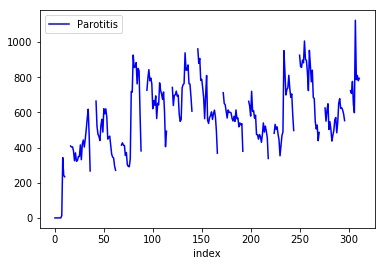

In [50]:
missing_germany.reset_index().plot(x='index',y='Parotitis',color='blue')

In [51]:
df['germany'] = df['germany'].interpolate(method='linear', limit_direction='forward', axis=0)

In [52]:
percent = (df['germany'].isnull().sum()/df['germany'].isnull().count()).sort_values(ascending=False)
percent

date                                                       0.0
Hepatitis-A-Impfstoff                                      0.0
Hepatosplenomegalie                                        0.0
Herdenzephalitis                                           0.0
Hexavalenter_Impfstoff                                     0.0
Hexenschuss                                                0.0
Hiatus_leucaemicus                                         0.0
Hordeolum                                                  0.0
Horner-Syndrom                                             0.0
Hospitalfieber                                             0.0
Hypalbuminämie                                             0.0
Hyperhydratation                                           0.0
Hyperkaliämie                                              0.0
Hypernatriämie                                             0.0
Hyperorexie                                                0.0
Hyperviskositätssyndrom                                

moving to italy

In [53]:
df_italy = df['italy']
df['italy'] = df_italy

In [54]:
df['italy'].dropna()

,week,incidence,Acrocianosi,Acroosteolisi,Adenoviridae,Adiadococinesia,Alfuy_virus,Alitosi,Alkhurma_virus,Alloherpesviridae,...,Wesselsbron_virus,Witzelsucht,Xantelasma,Xantoma,Xerosi,Xerostomia,Yaounde_virus,Yokose_virus,Zoonosi,date


In [55]:
df['italy'].dropna(axis=1)

,week,incidence,Acrocianosi,Acroosteolisi,Adiadococinesia,Alfuy_virus,Alitosi,Allucinazione_uditiva,Anatossina,Anemia_infettiva_equina,...,Virus_di_Norwalk,Virus_di_immunodeficienza_delle_scimmie,Virus_difettivi,Virus_oncolitici,Vomito,Xantoma,Xerosi,Yaounde_virus,Yokose_virus,date
0,2007-42,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-10-21
1,2007-43,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-10-28
2,2007-44,0.26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-11-04
3,2007-45,0.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-11-11
4,2007-46,0.51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-11-18
5,2007-47,0.61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-11-25
6,2007-48,0.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-12-02
7,2007-49,0.89,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,18.0,1.0,0.0,0.0,0.0,2007-12-09
8,2007-50,1.20,0.0,0.0,20.0,0.0,128.0,0.0,63.0,0.0,...,0.0,0.0,0.0,0.0,447.0,37.0,0.0,0.0,0.0,2007-12-16
9,2007-51,1.89,1.0,0.0,20.0,0.0,93.0,0.0,42.0,0.0,...,1.0,0.0,0.0,0.0,454.0,33.0,0.0,0.0,0.0,2007-12-23


In [56]:
#missing data
total = df['italy'].isnull().sum().sort_values(ascending=False)
total

Omsk_haemorrhagic_fever_virus    312
Lujo_virus                       310
Hepatitis_C_virus                307
Rocio_virus                      307
Zoonosi                          306
Bourbon_virus                    302
Bunyaviridae                     298
Hantavirus                       298
Powassan_virus                   288
Wesselsbron_virus                279
Nodding_disease                  276
HTLV                             276
Atelectasia                      256
Tymovirales                      252
Adenoviridae                     252
HIV                              240
Xerostomia                       240
Hepacivirus                      240
Asfarviridae                     228
Ascovirus                        228
Oliguria                         228
Alloherpesviridae                224
Langat_virus                     224
Megavirus_chilensis              224
Spondweni_virus                  219
Phycodnaviridae                  216
Caput_medusae                    216
F

In [57]:
percent = (df['italy'].isnull().sum()/df['italy'].isnull().count()).sort_values(ascending=False)

percent

Omsk_haemorrhagic_fever_virus    1.000000
Lujo_virus                       0.993590
Hepatitis_C_virus                0.983974
Rocio_virus                      0.983974
Zoonosi                          0.980769
Bourbon_virus                    0.967949
Bunyaviridae                     0.955128
Hantavirus                       0.955128
Powassan_virus                   0.923077
Wesselsbron_virus                0.894231
Nodding_disease                  0.884615
HTLV                             0.884615
Atelectasia                      0.820513
Tymovirales                      0.807692
Adenoviridae                     0.807692
HIV                              0.769231
Xerostomia                       0.769231
Hepacivirus                      0.769231
Asfarviridae                     0.730769
Ascovirus                        0.730769
Oliguria                         0.730769
Alloherpesviridae                0.717949
Langat_virus                     0.717949
Megavirus_chilensis              0

In [58]:
percent.describe()

count    473.000000
mean       0.119586
std        0.254068
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
dtype: float64

Dropping all columns where every element is zero.

In [59]:
df['italy'] = df['italy'].loc[:, (df['italy'] != 0).any(axis=0)]

In [60]:
percent = (df['italy'].isnull().sum()/df['italy'].isnull().count()).sort_values(ascending=False)

percent

Omsk_haemorrhagic_fever_virus    1.000000
Lujo_virus                       0.993590
Hepatitis_C_virus                0.983974
Rocio_virus                      0.983974
Zoonosi                          0.980769
Bourbon_virus                    0.967949
Bunyaviridae                     0.955128
Hantavirus                       0.955128
Powassan_virus                   0.923077
Wesselsbron_virus                0.894231
Nodding_disease                  0.884615
HTLV                             0.884615
Atelectasia                      0.820513
Tymovirales                      0.807692
Adenoviridae                     0.807692
HIV                              0.769231
Xerostomia                       0.769231
Hepacivirus                      0.769231
Asfarviridae                     0.730769
Ascovirus                        0.730769
Oliguria                         0.730769
Alloherpesviridae                0.717949
Langat_virus                     0.717949
Megavirus_chilensis              0

In [61]:
for column, null_percent in percent.items() :
    if null_percent > 0.2:
        df['italy'] = df['italy'].drop(columns=[column])

percent = (df['italy'].isnull().sum()/df['italy'].isnull().count()).sort_values(ascending=False)
percent

Reoviridae                                  0.192308
Hepadnaviridae                              0.153846
Flavivirus                                  0.153846
Oncovirus                                   0.153846
Retroviridae                                0.153846
Verruca                                     0.115385
Flavivirus_patogeni_per_l'uomo              0.000000
Febbre_emorragica_venezuelana               0.000000
Ginecomastia                                0.000000
Febbre_della_Rift_Valley                    0.000000
Febbre_di_Lassa                             0.000000
Febbre_di_Oroya                             0.000000
Febbre_emoglobinurica                       0.000000
Galattorrea                                 0.000000
Febbre_emorragica_boliviana                 0.000000
Febbre_gialla                               0.000000
Flaviviruses_tick-borne_encephalitis        0.000000
Febbre_maculosa_delle_Montagne_Rocciose     0.000000
Febbre_ricorrente                           0.

In [62]:
missing_italy = df['italy'].filter(['week', 'incidence', 'Verruca', 'Retroviridae', 'Oncovirus','Flavivirus', 'Hepadnaviridae', 'Reoviridae'], axis=1)

In [63]:
print('Verruca:\t'+str(df['italy'][df['italy'].columns[1:]].corr()['Verruca'][:].sort_values(ascending=False)[1]))
print('Retroviridae:\t'+str(df['italy'][df['italy'].columns[1:]].corr()['Retroviridae'][:].sort_values(ascending=False)[1]))
print('Oncovirus:\t'+str(df['italy'][df['italy'].columns[1:]].corr()['Oncovirus'][:].sort_values(ascending=False)[1]))
print('Flavivirus:\t'+str(df['italy'][df['italy'].columns[1:]].corr()['Flavivirus'][:].sort_values(ascending=False)[1]))
print('Hepadnaviridae:\t'+str(df['italy'][df['italy'].columns[1:]].corr()['Hepadnaviridae'][:].sort_values(ascending=False)[1]))
print('Reoviridae:\t'+str(df['italy'][df['italy'].columns[1:]].corr()['Reoviridae'][:].sort_values(ascending=False)[1]))

Verruca:	0.9084043376512518
Retroviridae:	0.7357897757770451
Oncovirus:	0.8502120117057074
Flavivirus:	0.7116537266263043
Hepadnaviridae:	0.8406864043567145
Reoviridae:	0.6595140268411095


As observed by looking at the dataframes, we cannot replace the NaNs by mean or medians as it s located near the peak values of incidence. So it may affect the model in a bad way.

Also, we can simply drop Verruca as it has a good correlation with other columns so its absence may not be felt.


In [64]:
df['italy'] = df['italy'].drop(columns=['Verruca'])

applying linear interpollation for the other columns

In [65]:
df['italy'] = df['italy'].interpolate(method='linear', limit_direction='forward', axis=0)

In [66]:
percent = (df['italy'].isnull().sum()/df['italy'].isnull().count()).sort_values(ascending=False)

percent

date                                       0.0
Febbre_ricorrente                          0.0
Febbre_da_zecca_del_Colorado               0.0
Febbre_della_Rift_Valley                   0.0
Febbre_di_Lassa                            0.0
Febbre_di_Oroya                            0.0
Febbre_emoglobinurica                      0.0
Febbre_emorragica_boliviana                0.0
Febbre_emorragica_venezuelana              0.0
Febbre_gialla                              0.0
Febbre_maculosa_delle_Montagne_Rocciose    0.0
Fenomeno_di_Koebner                        0.0
Febbre_bottonosa                           0.0
Feoifomicosi                               0.0
Festinatio                                 0.0
Flato_vaginale                             0.0
Flavivirus                                 0.0
Flavivirus_patogeni_per_l'uomo             0.0
Flaviviruses_tick-borne_encephalitis       0.0
Fremito_vocale_tattile                     0.0
Galattorrea                                0.0
Ginecomastia 

In [67]:
df_netherlands = df['netherlands']

The first 13 rows have incidence as NaN values, so we can go ahead and drop them.

In [68]:
df_netherlands = df_netherlands.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], axis=0)
df['netherlands'] = df_netherlands

In [69]:
df['netherlands'].dropna()

,"""Hand-,_voet-_en_mondziekte""",Aardbeientong,Abasie,Acholurie,Achylie,Acidose,Acrocyanose,Acrodynie,Acute_buik,Acute_cholangitis,...,Ziekenhuisinfectie,Ziekte-inzicht,Ziekte_van_Bornholm,Ziektebeeld,Zikakoorts,Zikavirus,Zweetziekte,incidence,week,date


In [70]:
df['netherlands'].dropna(axis=1)

,"""Hand-,_voet-_en_mondziekte""",Aardbeientong,Abasie,Acholurie,Achylie,Acidose,Acrocyanose,Acrodynie,Acute_buik,Acuut_reuma,...,Ziekenhuisinfectie,Ziekte-inzicht,Ziekte_van_Bornholm,Ziektebeeld,Zikakoorts,Zikavirus,Zweetziekte,incidence,week,date
13,0.0,106.0,16.0,11.0,7.0,269.0,132.0,11.0,78.0,302.0,...,50.0,15.0,98.0,69.0,0.0,0.0,1.0,34.238107,2010-03,2010-01-24
14,0.0,218.0,22.0,9.0,5.0,344.0,219.0,15.0,93.0,400.0,...,63.0,39.0,100.0,118.0,0.0,0.0,2.0,43.141687,2010-04,2010-01-31
15,0.0,212.0,15.0,13.0,13.0,284.0,150.0,18.0,101.0,369.0,...,104.0,45.0,104.0,108.0,0.0,0.0,1.0,36.716297,2010-05,2010-02-07
16,0.0,207.0,12.0,13.0,7.0,230.0,218.0,20.0,98.0,298.0,...,108.0,51.0,116.0,98.0,0.0,0.0,0.0,44.615941,2010-06,2010-02-14
17,0.0,208.0,16.0,22.0,13.0,250.0,209.0,19.0,84.0,340.0,...,92.0,47.0,101.0,75.0,0.0,0.0,4.0,37.480307,2010-07,2010-02-21
18,0.0,199.0,14.0,17.0,11.0,210.0,132.0,18.0,90.0,321.0,...,93.0,36.0,126.0,77.0,0.0,0.0,3.0,22.013271,2010-08,2010-02-28
19,0.0,191.0,27.0,9.0,4.0,264.0,149.0,9.0,92.0,368.0,...,94.0,34.0,101.0,91.0,0.0,0.0,9.0,37.556892,2010-09,2010-03-07
20,0.0,198.0,11.0,9.0,6.0,265.0,189.0,13.0,75.0,353.0,...,79.0,58.0,83.0,88.0,0.0,0.0,2.0,25.092371,2010-10,2010-03-14
21,0.0,183.0,11.0,23.0,3.0,249.0,165.0,15.0,85.0,370.0,...,85.0,42.0,97.0,94.0,0.0,0.0,0.0,25.941545,2010-11,2010-03-21
22,0.0,196.0,10.0,21.0,3.0,229.0,140.0,9.0,116.0,370.0,...,73.0,39.0,85.0,76.0,0.0,0.0,3.0,19.732529,2010-12,2010-03-28


In [71]:
#missing data
total = df['netherlands'].isnull().sum().sort_values(ascending=False)
total

Epidemie                                        245
Cocoliztli                                      239
Hepatitis_E                                     238
Coronavirinae                                   235
Phocine_distemper_virus                         234
Hantavirus                                      233
Middle_East_respiratory_syndrome_coronavirus    233
H2N2                                            229
H5N2                                            229
H1N1                                            229
Mydriase                                        220
Marseillevirus                                  220
Bornavirus                                      214
Hiv                                             211
Lipothrixviridae                                202
Pokken                                          199
Lumbago                                         193
Opisthotonus                                    184
Paramyxovirus                                   181
Middle_East_

In [72]:
percent = (df['netherlands'].isnull().sum()/df['netherlands'].isnull().count()).sort_values(ascending=False)

percent

Epidemie                                        0.991903
Cocoliztli                                      0.967611
Hepatitis_E                                     0.963563
Coronavirinae                                   0.951417
Phocine_distemper_virus                         0.947368
Hantavirus                                      0.943320
Middle_East_respiratory_syndrome_coronavirus    0.943320
H2N2                                            0.927126
H5N2                                            0.927126
H1N1                                            0.927126
Mydriase                                        0.890688
Marseillevirus                                  0.890688
Bornavirus                                      0.866397
Hiv                                             0.854251
Lipothrixviridae                                0.817814
Pokken                                          0.805668
Lumbago                                         0.781377
Opisthotonus                   

In [73]:
percent.describe()

count    385.000000
mean       0.120564
std        0.262138
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.991903
dtype: float64

Dropping all columns where every element is zero.

In [74]:
df['netherlands'] = df['netherlands'].loc[:, (df['netherlands'] != 0).any(axis=0)]

In [75]:
percent = (df['netherlands'].isnull().sum()/df['netherlands'].isnull().count()).sort_values(ascending=False)

percent

Epidemie                                        0.991903
Cocoliztli                                      0.967611
Hepatitis_E                                     0.963563
Coronavirinae                                   0.951417
Phocine_distemper_virus                         0.947368
Hantavirus                                      0.943320
Middle_East_respiratory_syndrome_coronavirus    0.943320
H1N1                                            0.927126
H5N2                                            0.927126
H2N2                                            0.927126
Mydriase                                        0.890688
Marseillevirus                                  0.890688
Bornavirus                                      0.866397
Hiv                                             0.854251
Lipothrixviridae                                0.817814
Pokken                                          0.805668
Lumbago                                         0.781377
Opisthotonus                   

In [76]:
for column, null_percent in percent.items() :
    if null_percent > 0.2:
        df['netherlands'] = df['netherlands'].drop(columns=[column])

percent = (df['netherlands'].isnull().sum()/df['netherlands'].isnull().count()).sort_values(ascending=False)
percent

Picornavirus                       0.194332
Parotitis                          0.194332
Flavivirus                         0.153846
Mycovirus                          0.072874
Alexie                             0.072874
Hepatitis_B                        0.036437
date                               0.000000
Geelzucht                          0.000000
Fibrose                            0.000000
Filovirussen                       0.000000
Fructosurie                        0.000000
Frühsommer-Meningoenzephalitis     0.000000
Gele_koorts                        0.000000
Gele-koortsvirus                   0.000000
Geleidingsafasie                   0.000000
Gemengde_afasie                    0.000000
Glucosurie                         0.000000
Gordelroos                         0.000000
Griep                              0.000000
Feliene_infectueuze_peritonitis    0.000000
Felien_immunodeficiëntievirus      0.000000
Groeipijn                          0.000000
Fasciculatie                    

In [77]:
missing_netherlands = df['netherlands'].filter(['week', 'incidence', 'Hepatitis_B', 'Alexie', 'Mycovirus','Flavivirus', 'Parotitis', 'Picornavirus'], axis=1)

In [78]:
print('Hepatitis_B:\t'+str(df['netherlands'][df['netherlands'].columns[1:]].corr()['Hepatitis_B'][:].sort_values(ascending=False)[1]))
print('Alexie:\t\t'+str(df['netherlands'][df['netherlands'].columns[1:]].corr()['Alexie'][:].sort_values(ascending=False)[1]))
print('Mycovirus:\t'+str(df['netherlands'][df['netherlands'].columns[1:]].corr()['Mycovirus'][:].sort_values(ascending=False)[1]))
print('Flavivirus:\t'+str(df['netherlands'][df['netherlands'].columns[1:]].corr()['Flavivirus'][:].sort_values(ascending=False)[1]))
print('Parotitis:\t'+str(df['netherlands'][df['netherlands'].columns[1:]].corr()['Parotitis'][:].sort_values(ascending=False)[1]))
print('Picornavirus:\t'+str(df['netherlands'][df['netherlands'].columns[1:]].corr()['Picornavirus'][:].sort_values(ascending=False)[1]))

Hepatitis_B:	0.9357265853378691
Alexie:		0.7728412760412878
Mycovirus:	0.6709966674628952
Flavivirus:	0.9145135495032191
Parotitis:	0.7978118700458686
Picornavirus:	0.3890343379223706


We can drop Hepatitis_B and Flavivirus.

In [79]:
df['netherlands'].drop(columns=['Hepatitis_B', 'Flavivirus'])

,Aardbeientong,Abasie,Acholurie,Achylie,Acidose,Acrocyanose,Acrodynie,Acute_buik,Acuut_reuma,Adenovirussen,...,Ziekenhuisinfectie,Ziekte-inzicht,Ziekte_van_Bornholm,Ziektebeeld,Zikakoorts,Zikavirus,Zweetziekte,incidence,week,date
13,106.0,16.0,11.0,7.0,269.0,132.0,11.0,78.0,302.0,170.0,...,50.0,15.0,98.0,69.0,0.0,0.0,1.0,34.238107,2010-03,2010-01-24
14,218.0,22.0,9.0,5.0,344.0,219.0,15.0,93.0,400.0,211.0,...,63.0,39.0,100.0,118.0,0.0,0.0,2.0,43.141687,2010-04,2010-01-31
15,212.0,15.0,13.0,13.0,284.0,150.0,18.0,101.0,369.0,245.0,...,104.0,45.0,104.0,108.0,0.0,0.0,1.0,36.716297,2010-05,2010-02-07
16,207.0,12.0,13.0,7.0,230.0,218.0,20.0,98.0,298.0,200.0,...,108.0,51.0,116.0,98.0,0.0,0.0,0.0,44.615941,2010-06,2010-02-14
17,208.0,16.0,22.0,13.0,250.0,209.0,19.0,84.0,340.0,214.0,...,92.0,47.0,101.0,75.0,0.0,0.0,4.0,37.480307,2010-07,2010-02-21
18,199.0,14.0,17.0,11.0,210.0,132.0,18.0,90.0,321.0,214.0,...,93.0,36.0,126.0,77.0,0.0,0.0,3.0,22.013271,2010-08,2010-02-28
19,191.0,27.0,9.0,4.0,264.0,149.0,9.0,92.0,368.0,224.0,...,94.0,34.0,101.0,91.0,0.0,0.0,9.0,37.556892,2010-09,2010-03-07
20,198.0,11.0,9.0,6.0,265.0,189.0,13.0,75.0,353.0,241.0,...,79.0,58.0,83.0,88.0,0.0,0.0,2.0,25.092371,2010-10,2010-03-14
21,183.0,11.0,23.0,3.0,249.0,165.0,15.0,85.0,370.0,207.0,...,85.0,42.0,97.0,94.0,0.0,0.0,0.0,25.941545,2010-11,2010-03-21
22,196.0,10.0,21.0,3.0,229.0,140.0,9.0,116.0,370.0,164.0,...,73.0,39.0,85.0,76.0,0.0,0.0,3.0,19.732529,2010-12,2010-03-28


Lets interpollate for the others.

In [82]:
df['netherlands'] = df['netherlands'].interpolate(method='linear', limit_direction='backward', axis=0)

In [83]:
percent = (df['netherlands'].isnull().sum()/df['netherlands'].isnull().count()).sort_values(ascending=False)
percent

date                               0.0
Felien_immunodeficiëntievirus      0.0
Fibrose                            0.0
Filovirussen                       0.0
Flavivirus                         0.0
Fructosurie                        0.0
Frühsommer-Meningoenzephalitis     0.0
Geelzucht                          0.0
Gele-koortsvirus                   0.0
Gele_koorts                        0.0
Geleidingsafasie                   0.0
Gemengde_afasie                    0.0
Glucosurie                         0.0
Gordelroos                         0.0
Griep                              0.0
Griepprik                          0.0
Groeipijn                          0.0
Feliene_infectueuze_peritonitis    0.0
Fasciculatie                       0.0
week                               0.0
Exophtalmus                        0.0
DTP-vaccin                         0.0
Decorumverlies                     0.0
Desoriëntatie                      0.0
Drive_Against_Malaria              0.0
Drukpijn                 

Done with all missing values imputations.